# Olympics Data Analysis

### NAME: ALLADI NIKHILA SAREA
### INDIVIDUAL CONTRIBUTION
### PROJECT - 1

### Project Description
The Olympics Data Analysis project focuses on exploring and understanding a dataset that captures all medal winners from the Summer Olympics held between 1976 in Montreal and 2008 in Beijing. This dataset encompasses every medal awarded during that period. The main objective of the project is to perform exploratory data analysis (EDA) to uncover patterns and trends related to medal distribution, highlight top-performing countries and athletes, examine gender-based participation and achievements, and effectively visualize these insights using Python.

#### Project Steps:
1. Data Preparation:
2. Exploratory Data Analysis (EDA):
3. Visualizing Key Insights:
4. Predictive Analysis:

## Data Preparation

### Import The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

### Load The Dataset

In [2]:
data = pd.read_csv(r"olympic.csv", encoding='latin1')

### cleaning the dataset

In [3]:
# initial number of duplicate valued in the dataset

duplicate = data.duplicated().sum()
print("The number of duplicates: ",duplicate)

The number of duplicates:  117


In [4]:
# dropping the duplicated and creationg a new dataset (df)

df = data.drop_duplicates()
dup = df.duplicated().sum()
print("The final number of duplicates: ",dup)

The final number of duplicates:  0


In [5]:
# finding the null values

null = df.isnull().sum()
print("Null values: ")
print(null)

Null values: 
City            1
Year            1
Sport           1
Discipline      1
Event           1
Athlete         1
Gender          1
Country_Code    1
Country         1
Event_gender    1
Medal           1
dtype: int64


In [6]:
# drop the null values

df = df.dropna()

## Exploratory Data Analysis (EDA)

### Summary statistics of the dataset

In [7]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [8]:
df.tail()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15315 non-null  object 
 1   Year          15315 non-null  float64
 2   Sport         15315 non-null  object 
 3   Discipline    15315 non-null  object 
 4   Event         15315 non-null  object 
 5   Athlete       15315 non-null  object 
 6   Gender        15315 non-null  object 
 7   Country_Code  15315 non-null  object 
 8   Country       15315 non-null  object 
 9   Event_gender  15315 non-null  object 
 10  Medal         15315 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [10]:
df.shape

(15315, 11)

In [11]:
df.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       15423, 15424, 15425, 15426, 15427, 15428, 15429, 15430, 15431, 15432],
      dtype='int64', length=15315)

In [12]:
num_con = df['Country'].nunique()
print("The number of countries: ", num_con)
countries = np.unique(df['Country'].dropna().values).tolist()
countries.sort()
countries

The number of countries:  127


['Afghanistan',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bermuda*',
 'Brazil',
 'Bulgaria',
 'Burundi',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guyana',
 'Hong Kong*',
 'Hungary',
 'Iceland',
 'Independent Olympic Participants (1992)',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Korea, North',
 'Korea, South',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Macedonia',
 'Malaysia',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Netherlands',
 'Netherlands Antilles*',
 'Ne

In [13]:
num_con = df['Sport'].nunique()
print("The number of unique sports: ", num_con)
countries = np.unique(df['Sport'].dropna().values).tolist()
countries.sort()
countries

The number of unique sports:  28


['Aquatics',
 'Archery',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Boxing',
 'Canoe / Kayak',
 'Cycling',
 'Equestrian',
 'Fencing',
 'Football',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Judo',
 'Modern Pentathlon',
 'Rowing',
 'Sailing',
 'Shooting',
 'Softball',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Triathlon',
 'Volleyball',
 'Weightlifting',
 'Wrestling']

In [14]:
num_con = df['Discipline'].nunique()
print("The number of sub events: ", num_con)
countries = np.unique(df['Discipline'].dropna().values).tolist()
countries.sort()
countries

The number of sub events:  41


['Archery',
 'Artistic G.',
 'Athletics',
 'BMX',
 'Badminton',
 'Baseball',
 'Basketball',
 'Beach volley.',
 'Boxing',
 'Canoe / Kayak F',
 'Canoe / Kayak S',
 'Cycling Road',
 'Cycling Track',
 'Diving',
 'Dressage',
 'Eventing',
 'Fencing',
 'Football',
 'Handball',
 'Hockey',
 'Judo',
 'Jumping',
 'Modern Pentath.',
 'Mountain Bike',
 'Rhythmic G.',
 'Rowing',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized S.',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampoline',
 'Triathlon',
 'Volleyball',
 'Water polo',
 'Weightlifting',
 'Wrestling Free.',
 'Wrestling Gre-R']

**CONCLUSION**
1. The dataset was verified to be clean, with no duplicate entries or missing values.
2. It consists of 15,316 rows and 11 columns.
3. A total of 127 countries took part in the events.
4. The participation spanned across 28 main sports categories, which included sub-categories, amounting to a total of 41 distinct sports.

### Plot and analyze trends of medals across years

In [15]:
# the total number of medals each in the dataset.

df['Medal'].value_counts()

Medal
Bronze    5258
Gold      5041
Silver    5016
Name: count, dtype: int64

In [16]:
# Creating separate columns for each type of medal, where each column contains 1s and 0s to indicate the presence or absence of that medal.

df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [17]:
df.shape

(15315, 14)

In [18]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Bronze,Gold,Silver
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,False,False,True
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,True,False,False
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,False,True,False
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,False,False,True
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,True,False,False


In [19]:
# years durin which the olympics is held.

print("Years the events are held: ")
year = np.unique(df['Year'].dropna().values).tolist()
year.sort()
year

Years the events are held: 


[1976.0, 1980.0, 1984.0, 1988.0, 1992.0, 1996.0, 2000.0, 2004.0, 2008.0]

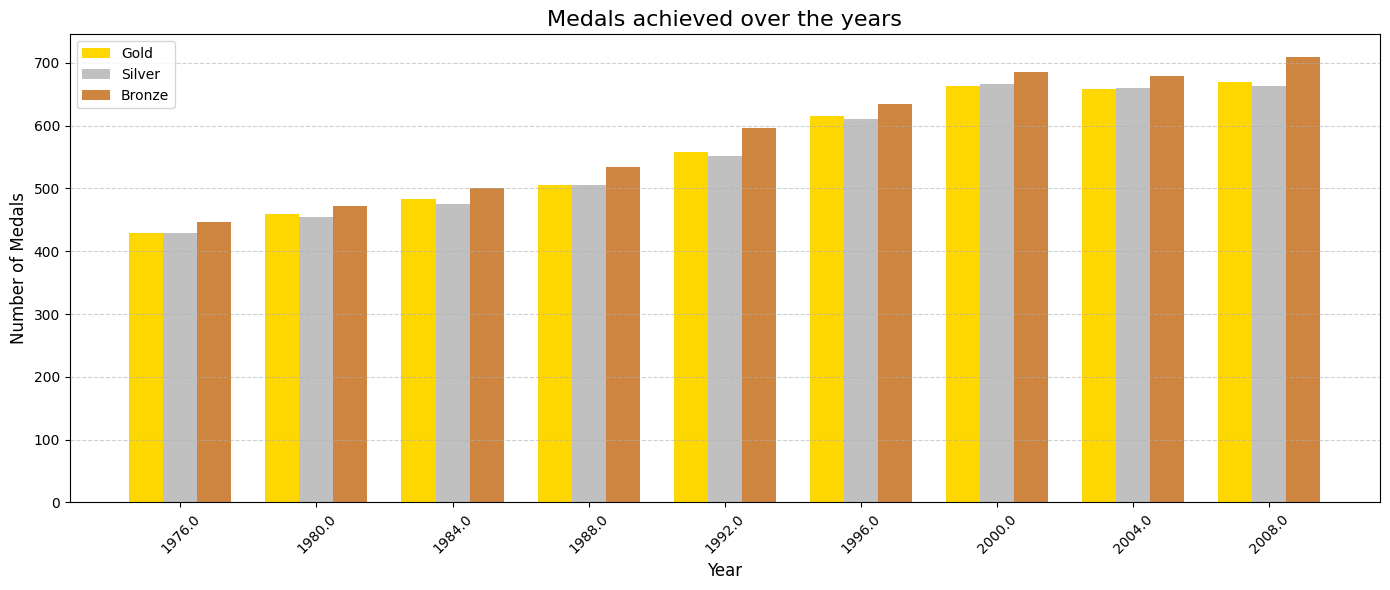

,Year,Gold,Silver,Bronze
0,1976.0,429,429,447
1,1980.0,459,455,472
2,1984.0,483,476,500
3,1988.0,506,505,535
4,1992.0,558,551,596
5,1996.0,615,610,634
6,2000.0,663,667,685
7,2004.0,659,660,679
8,2008.0,669,663,710


In [20]:
# A plot and list of years and their respective medal counts, arranged in ascending order according to the number of gold medals won.

def year_list(df):
    total_medals = df.groupby('Year')[['Gold' , 'Silver', 'Bronze']].sum()
    reset = total_medals.reset_index()

    plt.figure(figsize=(14, 6))
    bar_width = 0.25
    x = range(len(reset))

    plt.bar([i - bar_width for i in x], reset['Gold'], width=bar_width, label='Gold', color='gold')
    plt.bar(x, reset['Silver'], width=bar_width, label='Silver', color='silver')
    plt.bar([i + bar_width for i in x], reset['Bronze'], width=bar_width, label='Bronze', color='peru')

    plt.xticks(ticks=x, labels=reset['Year'], rotation=45)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Medals', fontsize=12)
    plt.title(f'Medals achieved over the years', fontsize=16)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return reset

year_list(df)

In [21]:
# the year with the maximum number of gold, silver and bronze medals.

total_medals = df.groupby('Year')[['Gold' , 'Silver', 'Bronze']].sum()
print("Year with the most number of: ")
print("gold medals:", int(total_medals['Gold'].idxmax()))
print("Silver medals:", int(total_medals['Silver'].idxmax()))
print("Bronze medals:", int(total_medals['Bronze'].idxmax()))

Year with the most number of: 
gold medals: 2008
Silver medals: 2000
Bronze medals: 2008


In [22]:
# the year with the minimum number of gold, silver and bronze medals.

print("Year with the least number of: ")
print("gold medals:", int(total_medals['Gold'].idxmin()))
print("Silver medals:", int(total_medals['Silver'].idxmin()))
print("Bronze medals:", int(total_medals['Bronze'].idxmin()))

Year with the least number of: 
gold medals: 1976
Silver medals: 1976
Bronze medals: 1976


In [23]:
# A function that generates a plot and a list of years along with the number of medals the country won, based on the specified country and type of medal 
# provided as input.

def country_MedalsOverYears(df, COUNTRY):
    # dataframe for the specified country
    country_df = df[df['Country'] == COUNTRY]

    # Group by year and sum all medal types
    medals = country_df.groupby('Year')[['Gold', 'Silver', 'Bronze']].sum().reset_index()

    # Plot
    plt.figure(figsize=(10, 5))
    width = 0.25
    x = medals['Year']
    x_indexes = range(len(x))

    plt.bar([i - width for i in x_indexes], medals['Gold'], width=width, label='Gold', color='gold')
    plt.bar(x_indexes, medals['Silver'], width=width, label='Silver', color='silver')
    plt.bar([i + width for i in x_indexes], medals['Bronze'], width=width, label='Bronze', color='peru')

    plt.title(f'{COUNTRY} - Medal Counts Over the Years', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Medals', fontsize=12)
    plt.xticks(ticks=x_indexes, labels=medals['Year'], rotation=90)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Return the result table
    return medals

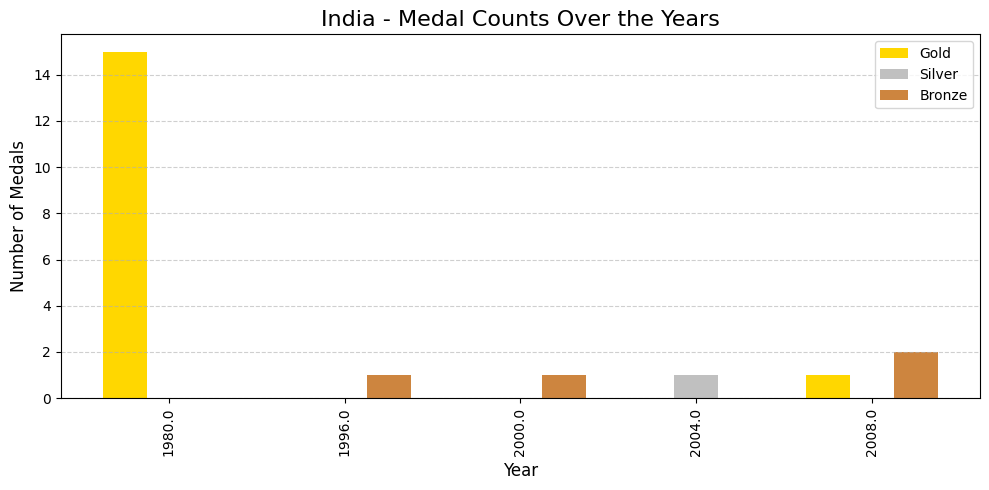

,Year,Gold,Silver,Bronze
0,1980.0,15,0,0
1,1996.0,0,0,1
2,2000.0,0,0,1
3,2004.0,0,1,0
4,2008.0,1,0,2


In [24]:
country_MedalsOverYears(df, 'India')

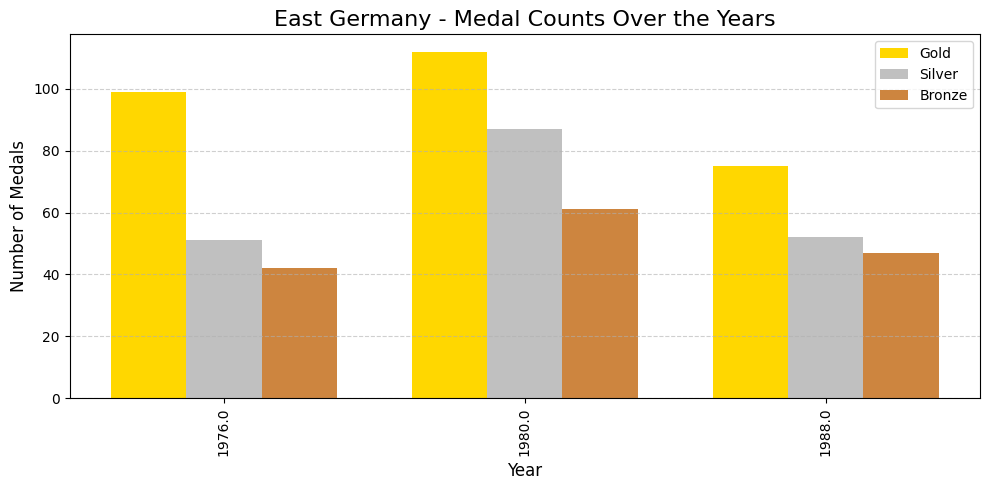

,Year,Gold,Silver,Bronze
0,1976.0,99,51,42
1,1980.0,112,87,61
2,1988.0,75,52,47


In [25]:
country_MedalsOverYears(df, 'East Germany')

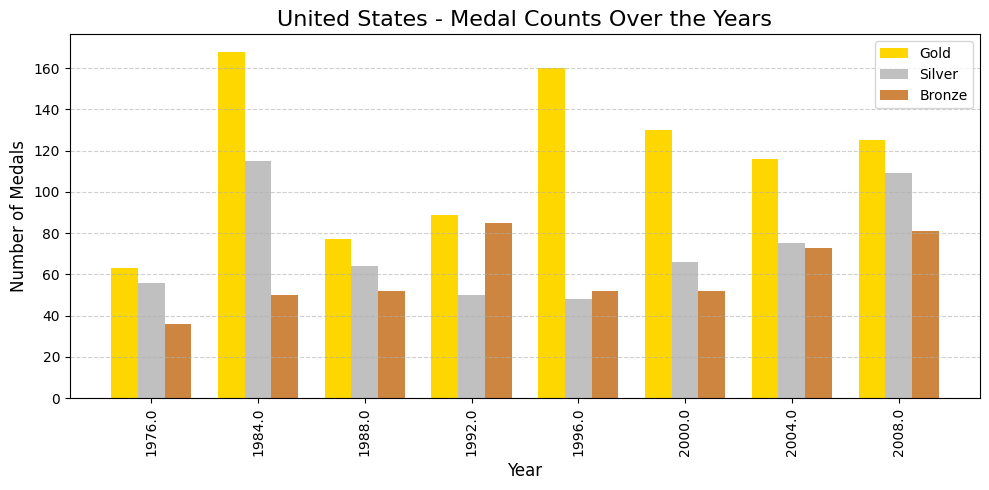

,Year,Gold,Silver,Bronze
0,1976.0,63,56,36
1,1984.0,168,115,50
2,1988.0,77,64,52
3,1992.0,89,50,85
4,1996.0,160,48,52
5,2000.0,130,66,52
6,2004.0,116,75,73
7,2008.0,125,109,81


In [26]:
country_MedalsOverYears(df, 'United States')

**CONCLUSION**
1. The dataset contains a total of 5,041 gold medals, 5,016 silver medals, and 5,258 bronze medals.
2. The years in which the Olympics were conducted have been identified.
3. It was observed that the highest number of gold and bronze medals were awarded in 2008, while the maximum number of silver medals were distributed in 2000.
4. The lowest overall medal distribution occurred in the year 1976.
5. India appears to have achieved its highest medal count in the 1980 Olympics.

### Identify the top-performing athletes and countries.

#### Countries over the years

In [27]:
# A list of countries and their respective medal counts, arranged in ascending order according to the number of gold medals won.

total_medals = df.groupby('Country')[['Gold' , 'Silver', 'Bronze']].sum()
sorted_medals = total_medals.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=[False, False, False])
reset = sorted_medals.reset_index()
reset.head(25)

,Country,Gold,Silver,Bronze
0,United States,928,583,481
1,Soviet Union,439,285,297
2,East Germany,286,190,150
3,Germany,237,176,278
4,China,234,252,193
5,Australia,216,270,312
6,Russia,192,206,240
7,France,154,110,185
8,Cuba,152,109,88
9,Italy,145,163,178


In [28]:
reset.tail(10)

,Country,Gold,Silver,Bronze
117,Barbados,0,0,1
118,Bermuda*,0,0,1
119,Djibouti,0,0,1
120,Eritrea,0,0,1
121,Guyana,0,0,1
122,Kuwait,0,0,1
123,Lebanon,0,0,1
124,Macedonia,0,0,1
125,Mauritius,0,0,1
126,Togo,0,0,1


In [29]:
# the countries with the maximum number of gold, silver and bronze medals.

print("Country with the most number of: ")
print("gold medals:", total_medals['Gold'].idxmax())
print("Silver medals:", total_medals['Silver'].idxmax())
print("Bronze medals:", total_medals['Bronze'].idxmax())

Country with the most number of: 
gold medals: United States
Silver medals: United States
Bronze medals: United States


In [30]:
# A dataset displaying the events and corresponding years in which India won a gold medal.

df[( df['Country_Code'] == 'IND') & (df['Medal'] == 'Gold')]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Bronze,Gold,Silver
2288,Moscow,1980.0,Hockey,Hockey,hockey,"SINGH, Singh",Men,IND,India,M,Gold,False,True,False
2289,Moscow,1980.0,Hockey,Hockey,hockey,"FERNANDES, Mervyn",Men,IND,India,M,Gold,False,True,False
2294,Moscow,1980.0,Hockey,Hockey,hockey,"GURMAIL, Singh",Men,IND,India,M,Gold,False,True,False
2302,Moscow,1980.0,Hockey,Hockey,hockey,"BASKARAN, Baskaran",Men,IND,India,M,Gold,False,True,False
2303,Moscow,1980.0,Hockey,Hockey,hockey,"ZAFAR, Zafar",Men,IND,India,M,Gold,False,True,False
2313,Moscow,1980.0,Hockey,Hockey,hockey,"MOHAMMAD, Shahid",Men,IND,India,M,Gold,False,True,False
2339,Moscow,1980.0,Hockey,Hockey,hockey,"KAUSHIK, Maharaj Krishon",Men,IND,India,M,Gold,False,True,False
2341,Moscow,1980.0,Hockey,Hockey,hockey,"SURINDER, Singh",Men,IND,India,M,Gold,False,True,False
2347,Moscow,1980.0,Hockey,Hockey,hockey,"KUMAR, Charanjit",Men,IND,India,M,Gold,False,True,False
2348,Moscow,1980.0,Hockey,Hockey,hockey,"SYLVANUS, Dung Dung",Men,IND,India,M,Gold,False,True,False


In [31]:
# A dataset displaying the events and corresponding years in which India won a silver medal.

df[( df['Country_Code'] == 'IND') & (df['Medal'] == 'Silver')]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Bronze,Gold,Silver
13051,Athens,2004.0,Shooting,Shooting,double trap (150 targets),"RATHORE, Rajyavardhan S.",Men,IND,India,M,Silver,False,False,True


In [32]:
# A dataset displaying the events and corresponding years in which India won a bronze medal.

df[( df['Country_Code'] == 'IND') & (df['Medal'] == 'Bronze')]

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Bronze,Gold,Silver
9191,Atlanta,1996.0,Tennis,Tennis,singles,"PAES, Leander",Men,IND,India,M,Bronze,True,False,False
11324,Sydney,2000.0,Weightlifting,Weightlifting,69kg,"MALLESWARI, Karnam",Women,IND,India,W,Bronze,True,False,False
14125,Beijing,2008.0,Boxing,Boxing,69 - 75 kg,"KUMAR, Vijender",Men,IND,India,M,Bronze,True,False,False
15389,Beijing,2008.0,Wrestling,Wrestling Free.,60 - 66kg,"KUMAR, Sushil",Men,IND,India,M,Bronze,True,False,False


In [33]:
# A function that generates a plot and a list of countries along with the number of medals they won in a specific year

def years_Top10Countries(df, YEAR):
    # Validate input year
    valid_years = [1976.0, 1980.0, 1984.0, 1988.0, 1992.0, 1996.0, 2000.0, 2004.0, 2008.0]
    if YEAR not in valid_years:
        raise ValueError(f"YEAR must be one of: {valid_years}")

    # data for the given year
    year_df = df[df['Year'] == YEAR]

    # Group by country and sum medals
    medals = year_df.groupby('Country')[['Gold', 'Silver', 'Bronze']].sum()

    # Add total column to get top 10
    medals['Total'] = medals['Gold'] + medals['Silver'] + medals['Bronze']
    top_countries = medals.sort_values('Total', ascending=False).head(10).reset_index()

    # Plot
    plt.figure(figsize=(14, 6))
    bar_width = 0.25
    x = range(len(top_countries))

    plt.bar([i - bar_width for i in x], top_countries['Gold'], width=bar_width, label='Gold', color='gold')
    plt.bar(x, top_countries['Silver'], width=bar_width, label='Silver', color='silver')
    plt.bar([i + bar_width for i in x], top_countries['Bronze'], width=bar_width, label='Bronze', color='peru')

    plt.xticks(ticks=x, labels=top_countries['Country'], rotation=45)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Number of Medals', fontsize=12)
    plt.title(f'Top 10 Countries by Total Medals in {int(YEAR)}', fontsize=16)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return top_countries[['Country', 'Gold', 'Silver', 'Bronze', 'Total']]


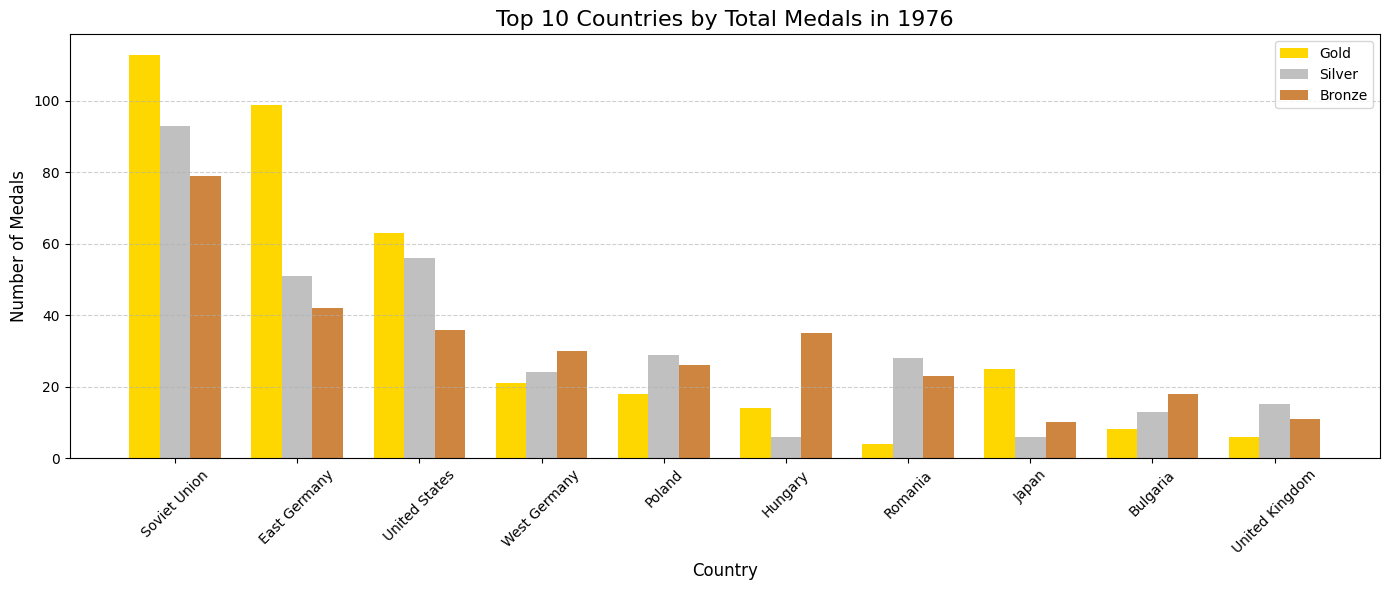

,Country,Gold,Silver,Bronze,Total
0,Soviet Union,113,93,79,285
1,East Germany,99,51,42,192
2,United States,63,56,36,155
3,West Germany,21,24,30,75
4,Poland,18,29,26,73
5,Hungary,14,6,35,55
6,Romania,4,28,23,55
7,Japan,25,6,10,41
8,Bulgaria,8,13,18,39
9,United Kingdom,6,15,11,32


In [34]:
years_Top10Countries(df, 1976)

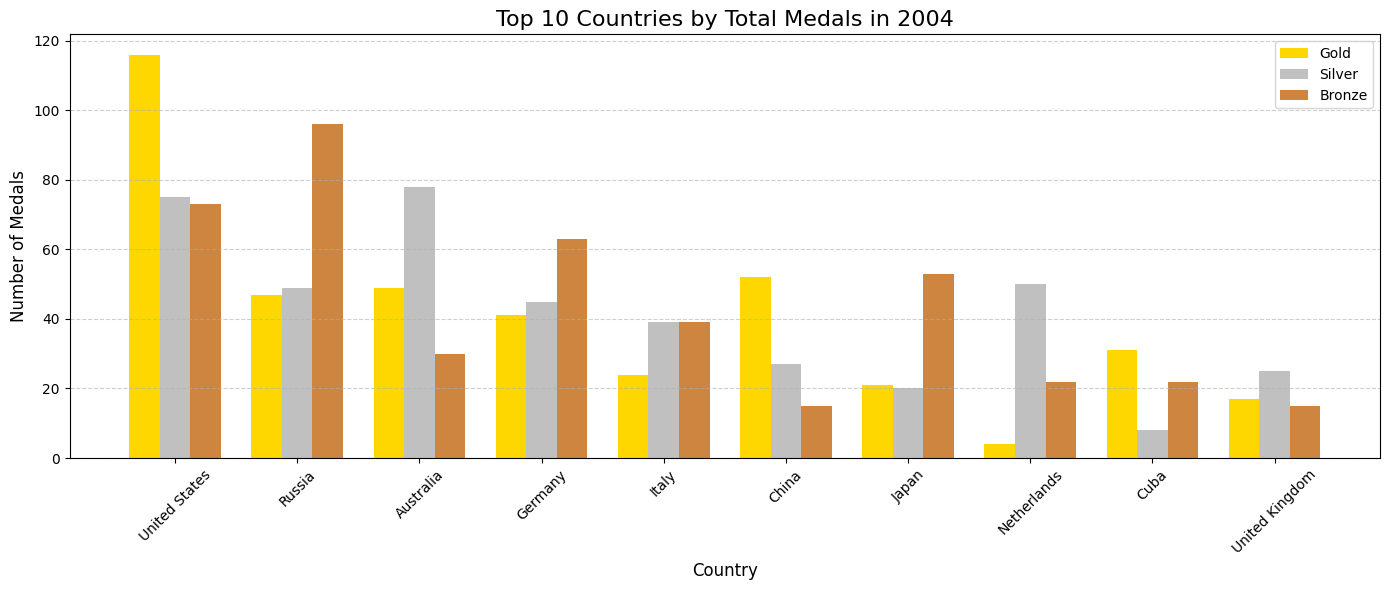

,Country,Gold,Silver,Bronze,Total
0,United States,116,75,73,264
1,Russia,47,49,96,192
2,Australia,49,78,30,157
3,Germany,41,45,63,149
4,Italy,24,39,39,102
5,China,52,27,15,94
6,Japan,21,20,53,94
7,Netherlands,4,50,22,76
8,Cuba,31,8,22,61
9,United Kingdom,17,25,15,57


In [35]:
years_Top10Countries(df, 2004)

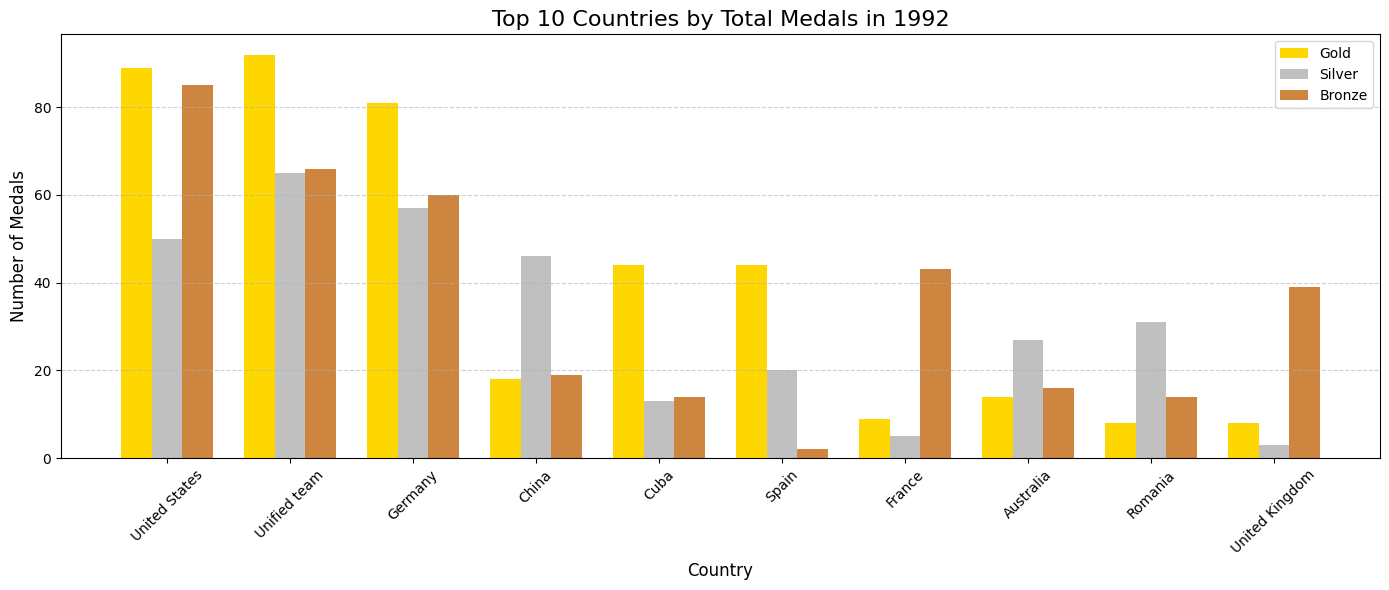

,Country,Gold,Silver,Bronze,Total
0,United States,89,50,85,224
1,Unified team,92,65,66,223
2,Germany,81,57,60,198
3,China,18,46,19,83
4,Cuba,44,13,14,71
5,Spain,44,20,2,66
6,France,9,5,43,57
7,Australia,14,27,16,57
8,Romania,8,31,14,53
9,United Kingdom,8,3,39,50


In [36]:
years_Top10Countries(df, 1992)

In [37]:
# A function that generates  a list of medals they won, based on the specified year and country provided as input.
# If the input: 'overall' is given , then the data accross the column is taken.

def medals_InYearCountry(df, YEAR, COUNTRY):
    # make sure the input is valid
    if YEAR not in [1976.0, 1980.0, 1984.0, 1988.0, 1992.0, 1996.0, 2000.0, 2004.0, 2008.0, 'overall']:
        raise ValueError("YEAR must be one of: [1976.0, 1980.0, 1984.0, 1988.0, 1992.0, 1996.0, 2000.0, 2004.0, 2008.0]")

    # dataframe with the required year and country
    if (YEAR == 'overall'):
        medal_list = df[(df['Country'] == COUNTRY)]
    elif (COUNTRY == 'overall'):
        medal_list = df[(df['Year'] == YEAR)]
    elif ((YEAR == 'overall') & (COUNTRY == 'overall')):
        medal_list = df
    else:
        medal_list = df[(df['Year'] == YEAR) & (df['Country'] == COUNTRY)]

    # Count medals by type
    medal_counts = medal_list['Medal'].value_counts().reset_index()
    medal_counts.columns = ['Medal Type', 'Count']
    
    return medal_counts

In [38]:
print("Medals INDIA acheived over the years:")
medals_InYearCountry(df, 'overall', 'India')

Medals INDIA acheived over the years:


,Medal Type,Count
0,Gold,16
1,Bronze,4
2,Silver,1


In [39]:
print("Medals the US acheived in 2000:")
medals_InYearCountry(df, 2000, 'United States')

Medals the US acheived in 2000:


,Medal Type,Count
0,Gold,130
1,Silver,66
2,Bronze,52


In [40]:
print("Medals Distributed in 2008:")
medals_InYearCountry(df, 2008, 'overall')

Medals Distributed in 2008:


,Medal Type,Count
0,Bronze,710
1,Gold,669
2,Silver,663


#### Athletes

In [41]:
# Top Performing athletes in overall olympics. (most medals)

total_athletes = df.groupby(['Country','Sport', 'Athlete','Gender'])[['Gold' , 'Silver', 'Bronze']].sum()
sorted_athletes = total_athletes.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=[False, False, False])
reset = sorted_athletes.reset_index()
reset.head()

,Country,Sport,Athlete,Gender,Gold,Silver,Bronze
0,United States,Aquatics,"PHELPS, Michael",Men,14,0,2
1,United States,Athletics,"LEWIS, Carl",Men,9,1,0
2,United States,Aquatics,"THOMPSON, Jenny",Women,8,3,1
3,United States,Aquatics,"BIONDI, Matthew",Men,8,2,1
4,Soviet Union,Gymnastics,"ANDRIANOV, Nikolay",Men,6,4,2


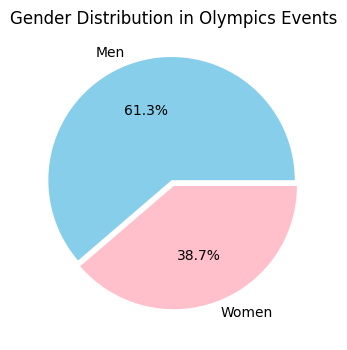

In [42]:
# gender distribution 

gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','pink'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

In [43]:
# Best male and female athletes in each sport.

# Best male athletes
male = df[df['Gender'] == 'Men']
male_athletes = male.groupby(['Sport', 'Athlete'])[['Gold', 'Silver', 'Bronze']].sum().reset_index()
male_athletes[['Gold', 'Silver', 'Bronze']] = male_athletes[['Gold', 'Silver', 'Bronze']].astype(int)
male_sorted = male_athletes.sort_values(by=['Sport', 'Gold', 'Silver', 'Bronze'], ascending=[True, False, False, False])
male_best = male_sorted.groupby('Sport').first().reset_index()

# Best female athletes
female = df[df['Gender'] == 'Women']
female_athletes = female.groupby(['Sport', 'Athlete'])[['Gold', 'Silver', 'Bronze']].sum().reset_index()
female_athletes[['Gold', 'Silver', 'Bronze']] = female_athletes[['Gold', 'Silver', 'Bronze']].astype(int)
female_sorted = female_athletes.sort_values(by=['Sport', 'Gold', 'Silver', 'Bronze'], ascending=[True, False, False, False])
female_best = female_sorted.groupby('Sport').first().reset_index()

# Merge 
best_combined = pd.merge(
    male_best[['Sport', 'Athlete', 'Gold', 'Silver', 'Bronze']],
    female_best[['Sport', 'Athlete', 'Gold', 'Silver', 'Bronze']],
    on='Sport',
    how='outer',
    suffixes=('_Male', '_Female')
)

# Print
print(f"{'Sport':<20} {'Male Athlete (G/S/B)':<35} {'Female Athlete (G/S/B)'}")
print("-" * 90)

for _, row in best_combined.iterrows():
    male_info = f"{row['Athlete_Male']} ({int(row['Gold_Male'])}/{int(row['Silver_Male'])}/{int(row['Bronze_Male'])})" if pd.notnull(row['Athlete_Male']) else "N/A"
    female_info = f"{row['Athlete_Female']} ({int(row['Gold_Female'])}/{int(row['Silver_Female'])}/{int(row['Bronze_Female'])})" if pd.notnull(row['Athlete_Female']) else "N/A"
    print(f"{row['Sport']:<20} {male_info:<35} {female_info}")


Sport                Male Athlete (G/S/B)                Female Athlete (G/S/B)
------------------------------------------------------------------------------------------
Aquatics             PHELPS, Michael (14/0/2)            THOMPSON, Jenny (8/3/1)
Archery              JANG, Yong-Ho (2/1/0)               KIM, Soo-Nyung (4/1/1)
Athletics            LEWIS, Carl (9/1/0)                 ASHFORD, Evelyn (4/1/0)
Badminton            KIM, Dong Moon (2/0/1)              GAO, Ling (2/1/1)
Baseball             LAZO, Pedro Luis (2/2/0)            N/A
Basketball           ROBINSON, David Maurice (2/0/1)     EDWARDS, Teresa (4/0/1)
Boxing               SAVON, Felix (3/0/0)                N/A
Canoe / Kayak        FERGUSON, Ian Gordon (4/1/0)        FISCHER, Birgit (8/4/0)
Cycling              HOY, Chris (4/1/0)                  ZIJLAARD-VAN MOORSEL, Leontien (4/1/1)
Equestrian           KLIMKE, Reiner (4/0/1)              WERTH, Isabell (5/3/0)
Fencing              POZDNYAKOV, Stanislav (4/0/1)  

In [44]:
# A function to generate a list of top-performing athletes in the events of a specified sport and its discipline.

import difflib

def athletes_Event(df, Sport, Discipline=None):
    # Check if the Sport is valid
    available_sports = df['Sport'].unique()
    if Sport not in available_sports:
        close_matches = difflib.get_close_matches(Sport, available_sports, n=3, cutoff=0.5)
        print(f"❌ Sport '{Sport}' not found.")
        if close_matches:
            print("Did you mean:")
            for match in close_matches:
                print("-", match)
        else:
            print("No similar sport names found.")
        return None

    # If Discipline is not provided, list all disciplines under the Sport
    if Discipline is None:
        disciplines = df[df['Sport'] == Sport]['Discipline'].unique()
        print(f"Available disciplines under '{Sport}':")
        for d in disciplines:
            print("-", d)
        return None

    # Check if the Discipline is valid for the given Sport
    valid_disciplines = df[df['Sport'] == Sport]['Discipline'].unique()
    if Discipline not in valid_disciplines:
        close_matches = difflib.get_close_matches(Discipline, valid_disciplines, n=3, cutoff=0.5)
        print(f"❌ Discipline '{Discipline}' not found under sport '{Sport}'.")
        if close_matches:
            print("Did you mean:")
            for match in close_matches:
                print("-", match)
        else:
            print("No similar discipline names found.")
        return None

    # Filter the dataset for valid Sport and Discipline
    list_ath = df[(df['Sport'] == Sport) & (df['Discipline'] == Discipline)]

    # Group by Event and Athlete, then sum medal counts
    ath1 = list_ath.groupby(['Event', 'Athlete'])[['Gold', 'Silver', 'Bronze']].sum().reset_index()
    ath2 = ath1.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=[False, False, False])
    ath3 = ath2.groupby('Event').first().reset_index()

    return ath3


In [45]:
# top performing athletes in 'aquatics' - 'diving'

athletes_Event(df, 'Aquatics', 'Diving')

,Event,Athlete,Gold,Silver,Bronze
0,10m platform,"LOUGANIS, Gregory",2,1,0
1,3m springboard,"GUO, Jingjing",2,1,0
2,synchronized diving 10m platform,"TIAN, Liang",1,1,0
3,synchronized diving 3m springboard,"GUO, Jingjing",2,1,0


In [46]:
# top performing athletes in 'Cycling' - 'Cycling Track'

athletes_Event(df, 'Cycling', 'Cycling Track')

,Event,Athlete,Gold,Silver,Bronze
0,1km time trial,"GRÜNKE, Klaus-Jürgen",1,0,0
1,500m time trial,"BALLANGER, Felicia",1,0,0
2,Individual Pursuit,"WIGGINS, Bradley",2,0,0
3,Keirin,"BAYLEY, Ryan",1,0,0
4,Madison,"AITKEN, Brett",1,0,0
5,Olympic Sprint,"GANE, Laurent",1,0,0
6,Points Race,"LLANERAS, Joan",2,1,0
7,Sprint indivual,"FIEDLER, Jens",2,0,1
8,Team Pursuit (4000m),"FULST, Guido",2,0,0
9,Team Sprint,"NIMKE, Stefan",1,0,1


#### **CONCLUSION**
1. **The United States** emerged as the top-performing country.
2. India secured 16 gold, 1 silver, and 4 bronze medals through the entire olympics.
3. The top 10 countries with the highest number of medals were identified over several years.
4. A function has been created to find the medal list of countries over the years or a particular year.
5. **PHELPS, Michael** of United States is the Top- Performing Athlete in the Overall Summer Olympics.
6. A complete list of Top performing male and female athletes in each sport has been found.
7. A function has been created to find the top performing athlete in a  each particular event. 

## Visualizing Key Insights

### Visualize the distribution of medals by country, year, and sport.

In [47]:
# Find the top 3 countries for a specified year and sport.

def top_countries_by_sport(df, year, sport):
    # Filter for the given year and sport
    df_year = df[(df['Year'] == year) & (df['Sport'] == sport)]

    # Count medals by Country
    medal_counts = df_year.groupby('Country').size().reset_index(name='Medal Count')

    # Sort and get top 3 countries
    top3 = medal_counts.sort_values('Medal Count', ascending=False).head(3)

    # Plotting
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=top3, x='Country', y='Medal Count', hue='Country', palette='Set2', dodge=False, width=0.5)
 


    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

    plt.title(f"Top 3 Countries in {sport} - {year}", fontsize=16)
    plt.xlabel("Country", fontsize=12)
    plt.ylabel("Medal Count", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()


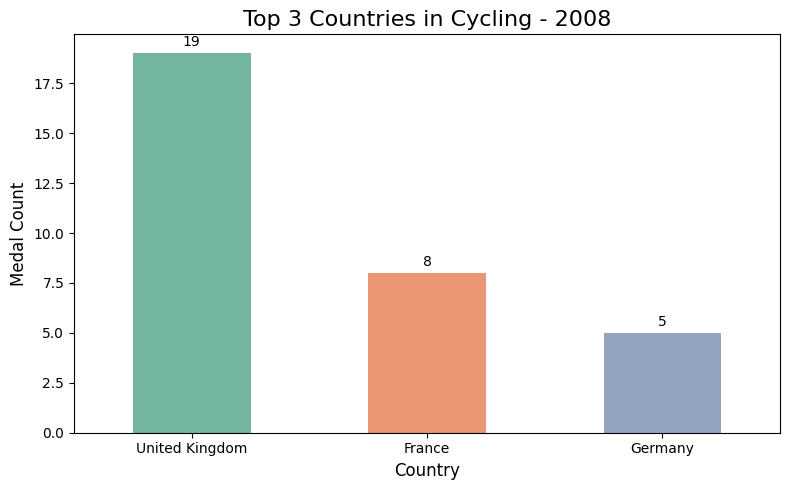

In [48]:
# Top 3 countries in cycling

top_countries_by_sport(df, 2008, 'Cycling')

In [49]:
# Find the top performing country for every sport in a given year or all the years.

def top_country_per_sport(df, year):
    # make sure the year is valid
    if year not in [1976.0, 1980.0, 1984.0, 1988.0, 1992.0, 1996.0, 2000.0, 2004.0, 2008.0, 'overall']:
        raise ValueError("YEAR must be one of: [1976.0, 1980.0, 1984.0, 1988.0, 1992.0, 1996.0, 2000.0, 2004.0, 2008.0]")
        
    # Filter the dataset for the given year
    if (year == 'overall'):
        df_year = df
    else:
        df_year = df[df['Year'] == year]

    # Count medals by sport and country
    medal_counts = df_year.groupby(['Sport', 'Country']).size().reset_index(name='Medal Count')

    # Find top 1 country per sport
    top_countries = medal_counts.sort_values(['Sport', 'Medal Count'], ascending=[True, False])
    top1 = top_countries.groupby('Sport').first().reset_index()

    # Plotting
    plt.figure(figsize=(12, len(top1) * 0.4))
    ax = sns.barplot(data=top1, y='Sport', x='Medal Count', color='skyblue', width=0.6)

    # Add country name labels on the bars
    for index, row in top1.iterrows():
        ax.text(row['Medal Count'] + 0.1, index, row['Country'], va='center', fontsize=9)

    plt.title(f"Top Country in Each Sport - {year}", fontsize=16)
    plt.xlabel("Medal Count")
    plt.ylabel("Sport")
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()

    return top1


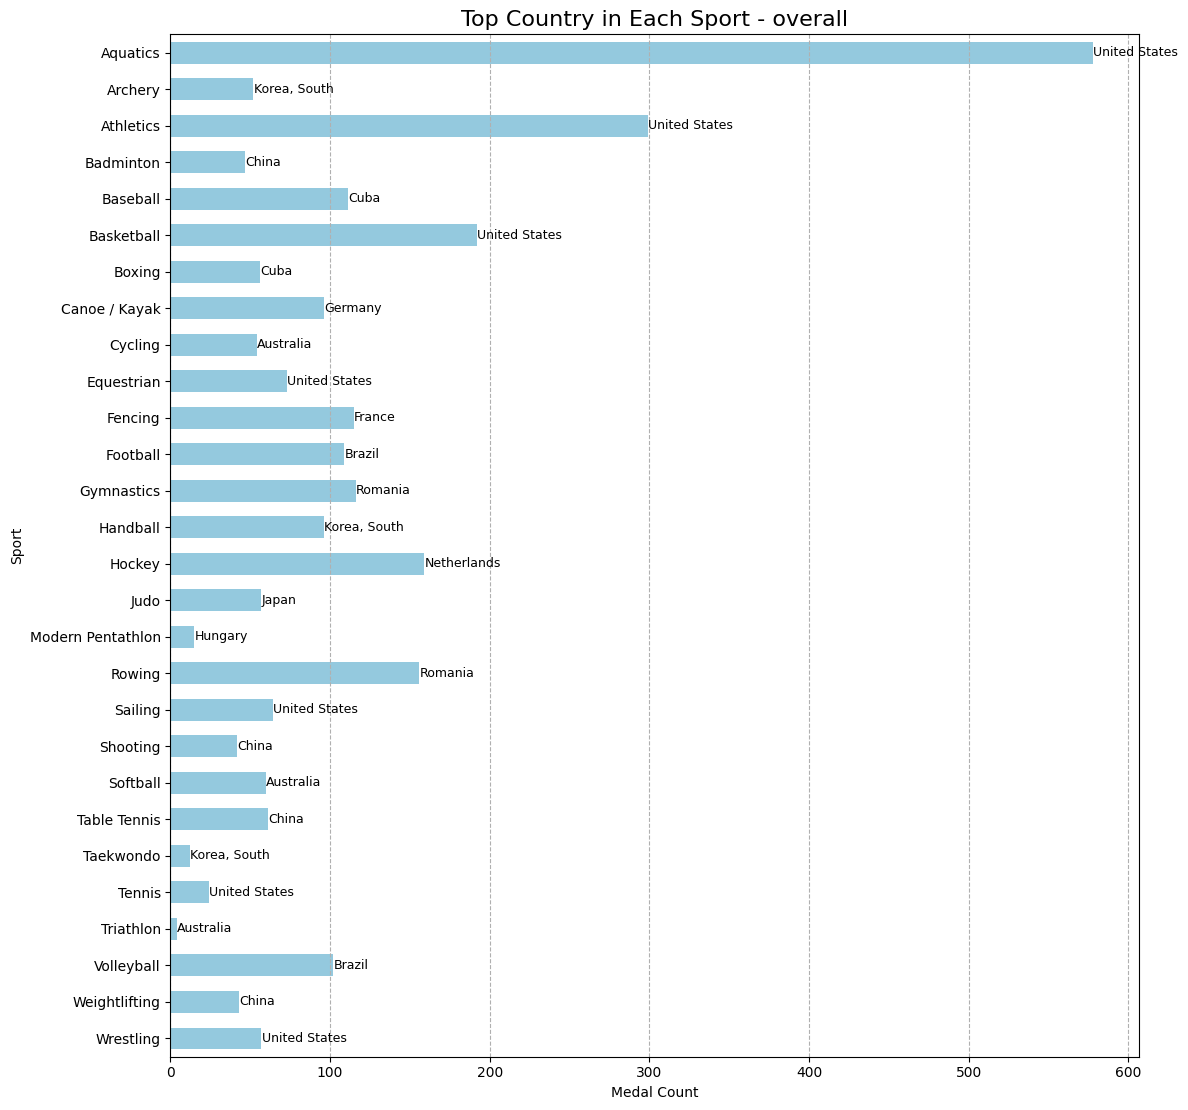

,Sport,Country,Medal Count
0,Aquatics,United States,578
1,Archery,"Korea, South",52
2,Athletics,United States,299
3,Badminton,China,47
4,Baseball,Cuba,111
5,Basketball,United States,192
6,Boxing,Cuba,56
7,Canoe / Kayak,Germany,96
8,Cycling,Australia,54
9,Equestrian,United States,73


In [50]:
top_country_per_sport(df, 'overall')

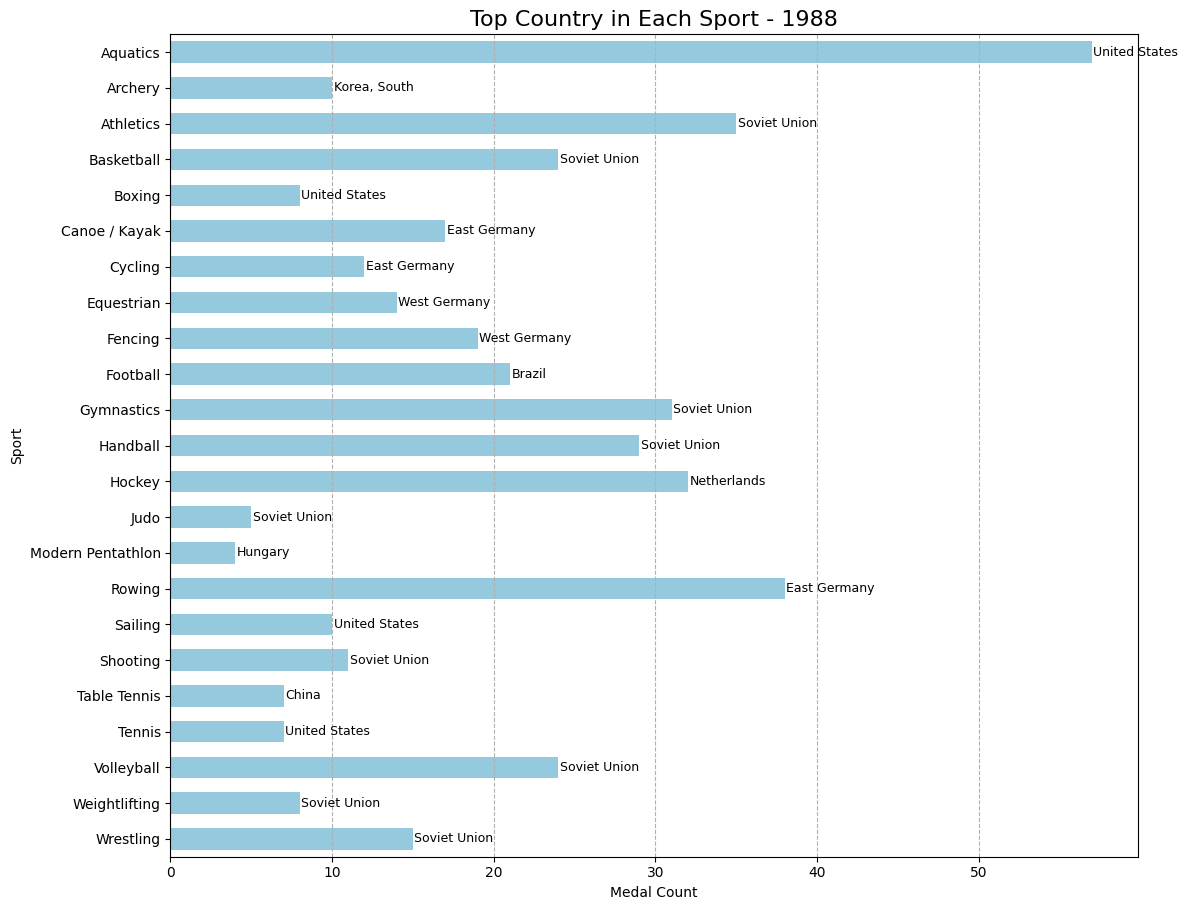

,Sport,Country,Medal Count
0,Aquatics,United States,57
1,Archery,"Korea, South",10
2,Athletics,Soviet Union,35
3,Basketball,Soviet Union,24
4,Boxing,United States,8
5,Canoe / Kayak,East Germany,17
6,Cycling,East Germany,12
7,Equestrian,West Germany,14
8,Fencing,West Germany,19
9,Football,Brazil,21


In [51]:
top_country_per_sport(df, 1988)

In [52]:
def country_acheivements(df, country):
    # Filter data for the given country
    country_df = df[df['Country'] == country].copy()

    # Create a new column for total medals
    country_df.loc[:, 'Total'] = country_df[['Gold', 'Silver', 'Bronze']].sum(axis=1)

    # Group by Sport and Year, summing total medals
    pivot_data = country_df.groupby(['Sport', 'Year'])['Total'].sum().unstack(fill_value=0)

    # Plot heatmap
    plt.figure(figsize=(14, len(pivot_data) * 0.5))
    sns.heatmap(pivot_data, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')
    plt.title(f"{country} Medal Achievements")
    plt.xlabel("Year")
    plt.ylabel("Sport")
    plt.tight_layout()
    plt.show()


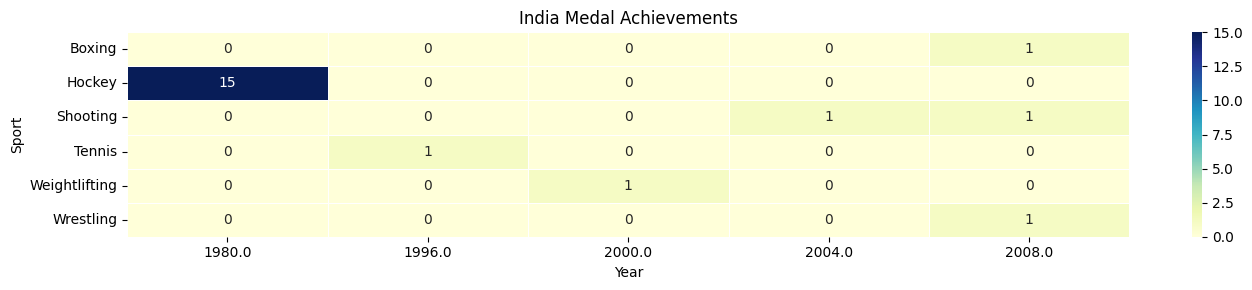

In [53]:
country_acheivements(df, 'India')

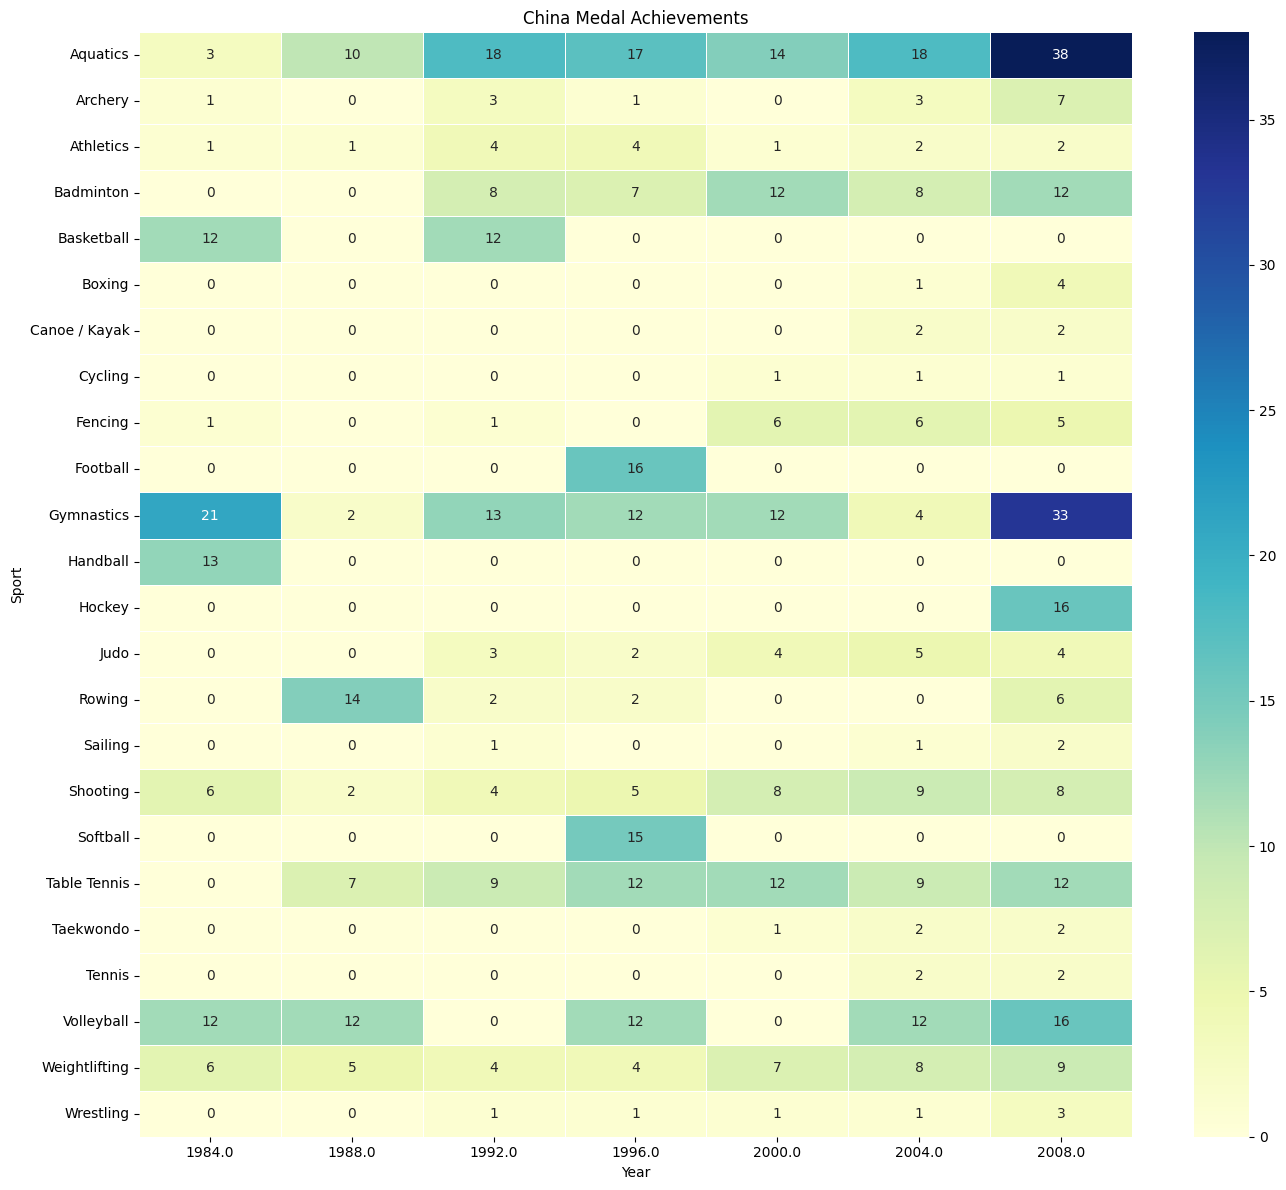

In [54]:
country_acheivements(df, 'China')

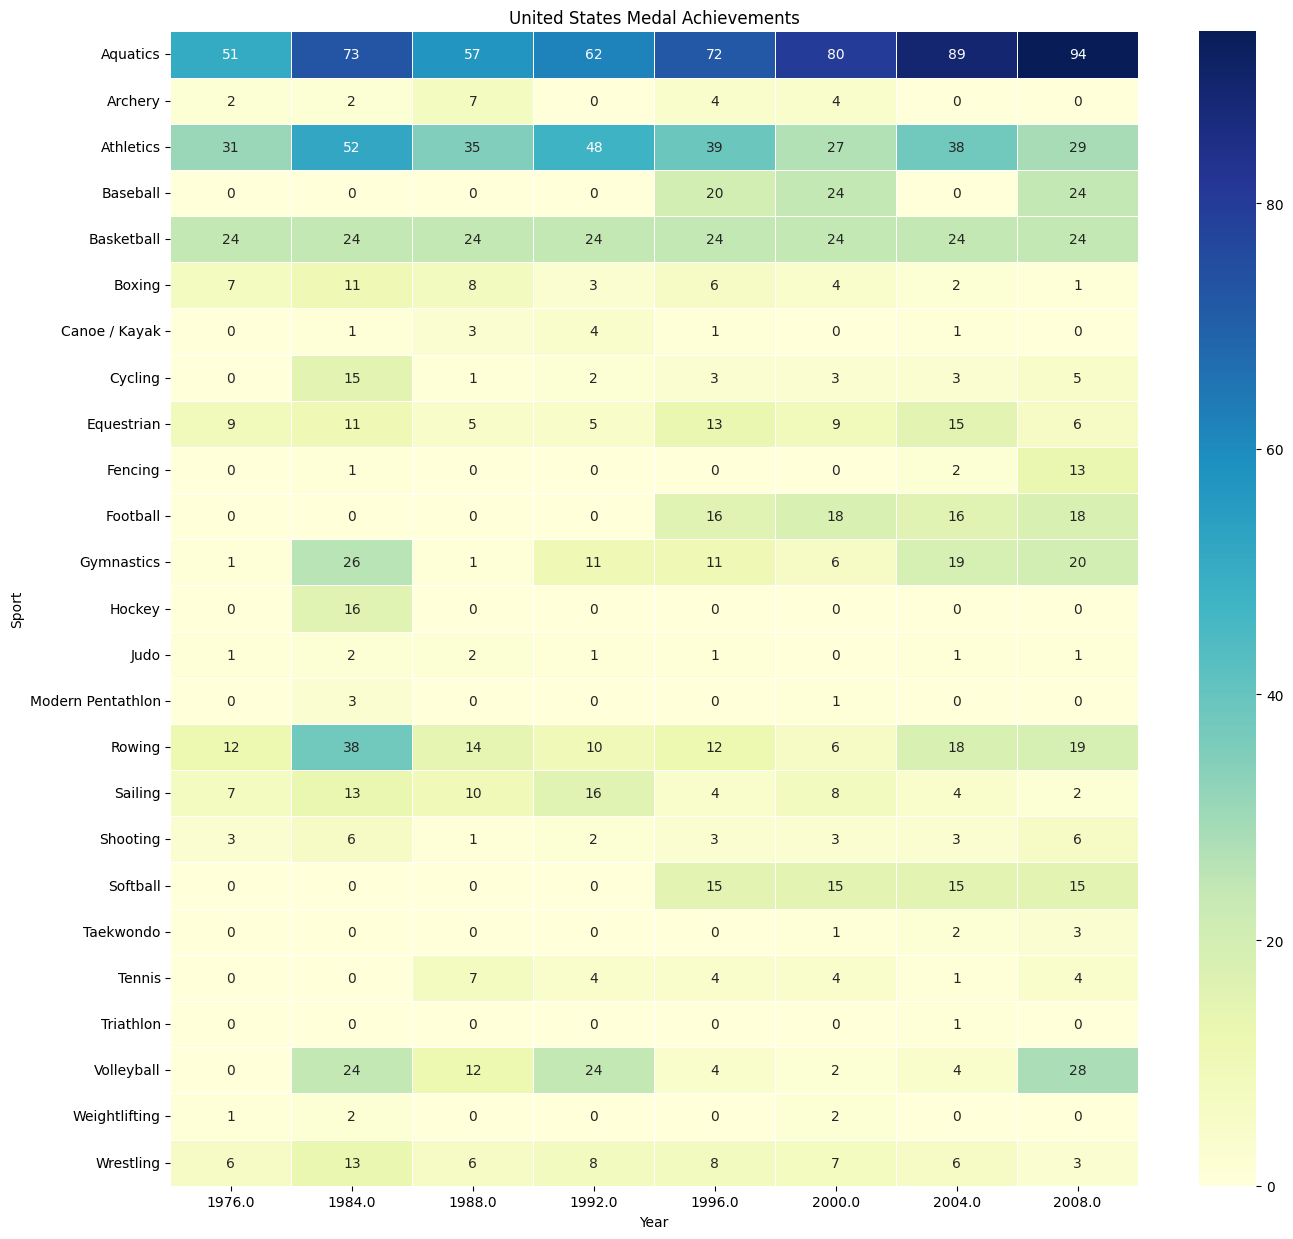

In [55]:
country_acheivements(df, 'United States')

### Analyze gender distribution in different sports/events.

In [56]:
# gender distribution accross sports.

def gender_distribution_by_sport(df):
    # Group by Sport and Sex to count participants
    gender_counts = df.groupby(['Sport', 'Gender']).size().reset_index(name='Count')

    # Plot
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=gender_counts, x='Sport', y='Count', hue='Gender', palette={'Men': 'skyblue', 'Women': 'pink'})
    
    plt.title("Gender Distribution Across Different Sports", fontsize=16)
    plt.xlabel("Sport", fontsize=12)
    plt.ylabel("Number of Participants", fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


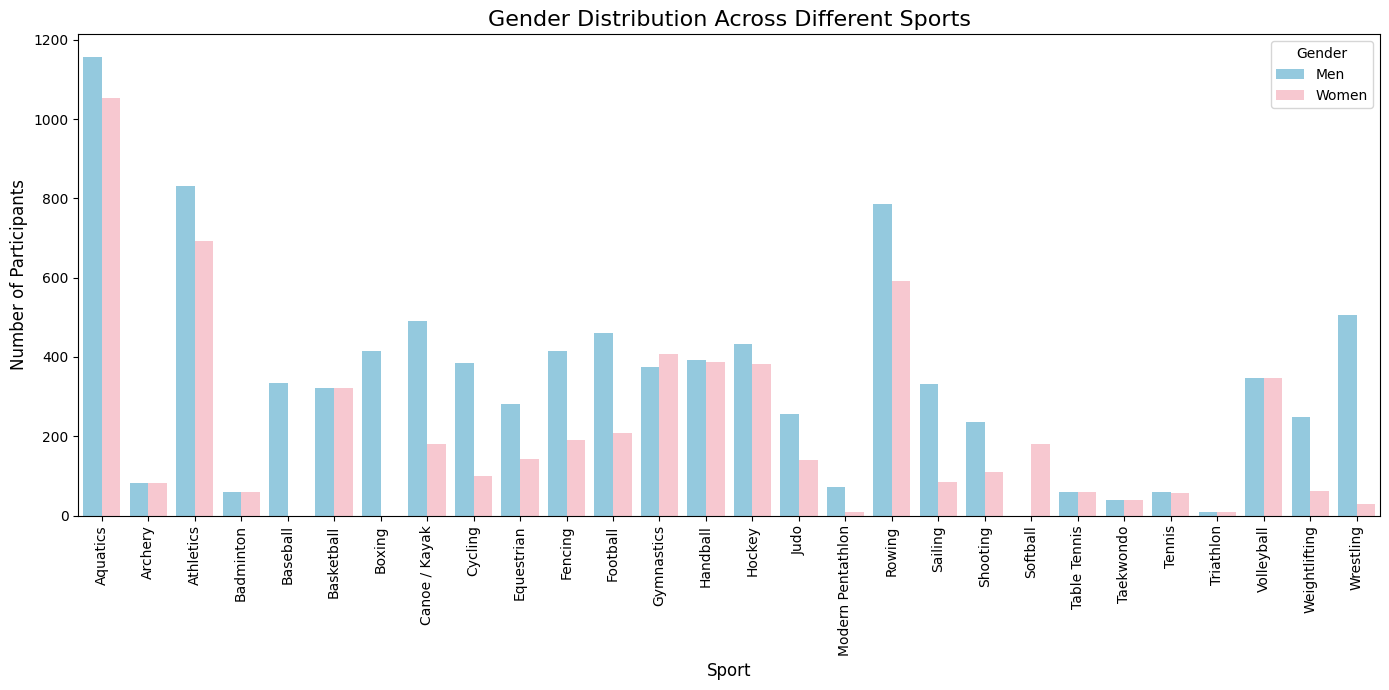

In [57]:
gender_distribution_by_sport(df)

In [58]:
# gender distribution accross disciplines in a particular sport

def gender_distribution_by_discipline(df, sport):
    df_sport = df[df['Sport'] == sport]
    # Group by Sport and Sex to count participants
    gender_counts = df_sport.groupby(['Discipline', 'Gender']).size().reset_index(name='Count')

    # Plot
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=gender_counts, x='Discipline', y='Count', hue='Gender', palette={'Men': 'skyblue', 'Women': 'pink'})
    
    plt.title(f"Gender Distribution Across Different Disciplines in {sport}", fontsize=16)
    plt.xlabel("Discipline", fontsize=12)
    plt.ylabel("Number of Participants", fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

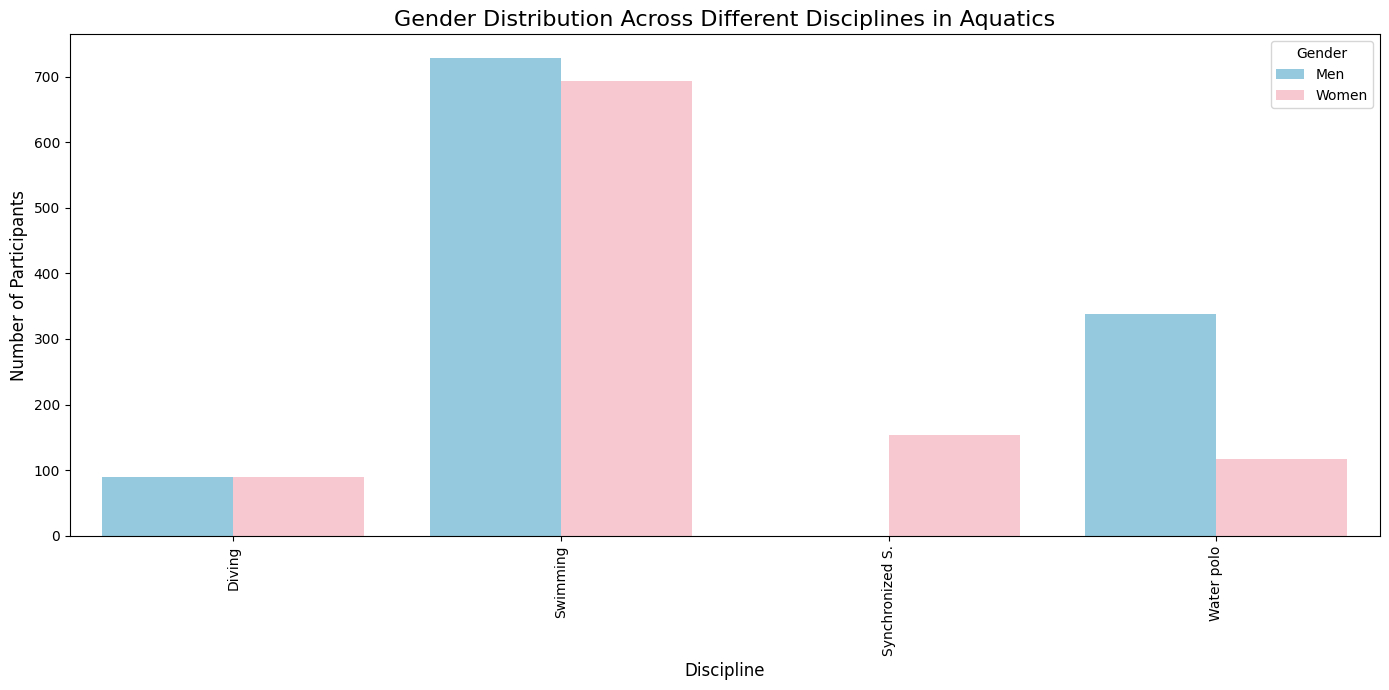

In [59]:
gender_distribution_by_discipline(df, 'Aquatics')

In [60]:
# gender distribution accross events for a specific sport and discipline.

def gender_distribution_by_event(df, Sport, Discipline = None):
    # Check if the Sport is valid
    available_sports = df['Sport'].unique()
    if Sport not in available_sports:
        close_matches = difflib.get_close_matches(Sport, available_sports, n=3, cutoff=0.5)
        print(f"❌ Sport '{Sport}' not found.")
        if close_matches:
            print("Did you mean:")
            for match in close_matches:
                print("-", match)
        else:
            print("No similar sport names found.")
        return None

    # If Discipline is not provided, list all disciplines under the Sport
    if Discipline is None:
        disciplines = df[df['Sport'] == Sport]['Discipline'].unique()
        print(f"Available disciplines under '{Sport}':")
        for d in disciplines:
            print("-", d)
        return None

    # Check if the Discipline is valid for the given Sport
    valid_disciplines = df[df['Sport'] == Sport]['Discipline'].unique()
    if Discipline not in valid_disciplines:
        close_matches = difflib.get_close_matches(Discipline, valid_disciplines, n=3, cutoff=0.5)
        print(f"❌ Discipline '{Discipline}' not found under sport '{Sport}'.")
        if close_matches:
            print("Did you mean:")
            for match in close_matches:
                print("-", match)
        else:
            print("No similar discipline names found.")
        return None
        
    df_sport = df[(df['Sport'] == Sport) & (df['Discipline'] == Discipline)]
    # Group by Sport and Sex to count participants
    gender_counts = df_sport.groupby(['Event', 'Gender']).size().reset_index(name='Count')

    # Plot
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=gender_counts, x='Event', y='Count', hue='Gender', palette={'Men': 'skyblue', 'Women': 'pink'})
    
    plt.title(f"Gender Distribution accross events in {Sport} - {Discipline}", fontsize=16)
    plt.xlabel("Event", fontsize=12)
    plt.ylabel("Number of Participants", fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

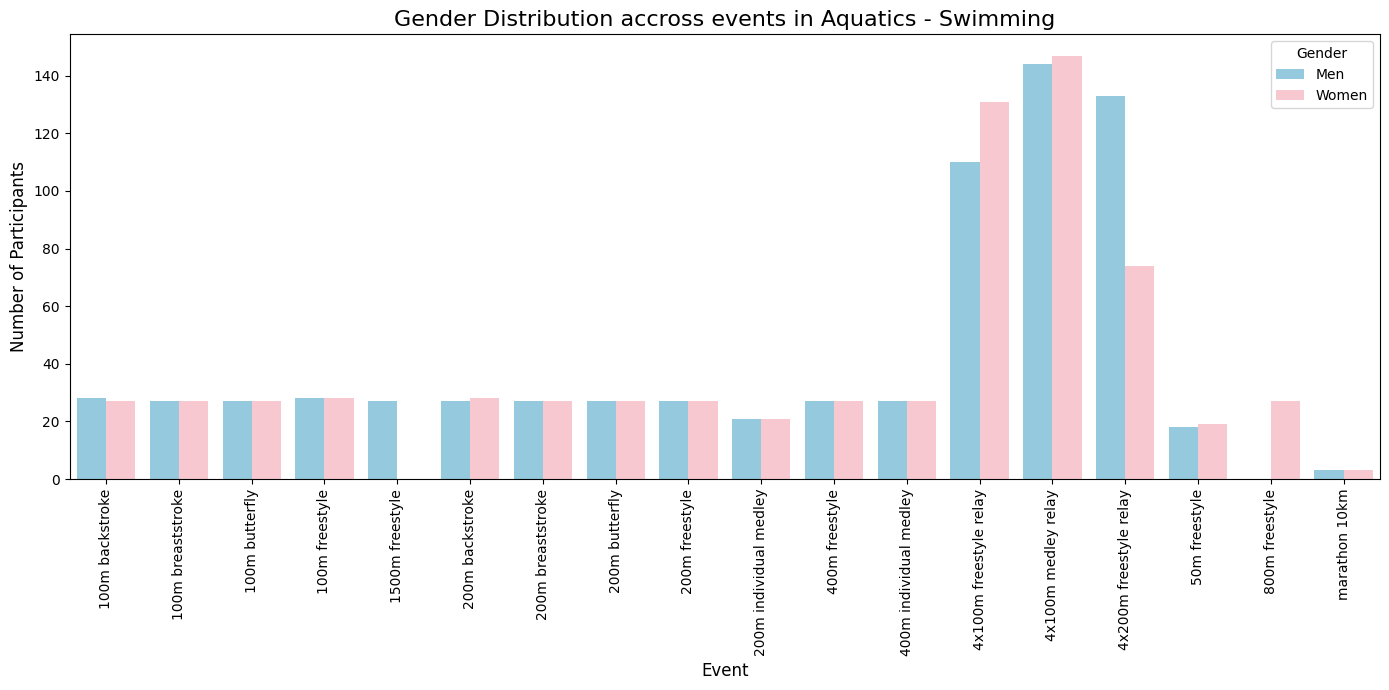

In [61]:
gender_distribution_by_event(df, 'Aquatics', 'Swimming')

## Predictive Analysis
### Train a machine learning model to predict whether an athlete will win a medal based on their country, sport, and other attributes.

In [62]:
df_model = data.drop(columns = ['City', 'Discipline', 'Event','Year', 'Country', 'Athlete'])
df_model['Medal'] = df_model['Medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1, np.nan: 0})
df_model

,Sport,Gender,Country_Code,Event_gender,Medal
0,Aquatics,Women,GDR,W,1
1,Aquatics,Men,URS,M,1
2,Aquatics,Men,USA,M,1
3,Aquatics,Men,ITA,M,1
4,Aquatics,Women,USA,W,1
...,...,...,...,...,...
15428,Wrestling,Men,FRA,M,1
15429,Wrestling,Men,GEO,M,1
15430,Wrestling,Men,AZE,M,1
15431,Wrestling,Men,FRA,M,1


In [63]:
x = df_model.drop('Medal', axis=1)
y = df_model['Medal']

In [64]:
categorical = ['Sport', 'Gender', 'Country_Code', 'Event_gender']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical)]
)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [66]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [67]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sport', 'Gender',
                                                   'Country_Code',
                                                   'Event_gender'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [68]:
y_pred = pipeline.predict(x_test)

In [69]:
print("\n--- Model Evaluation ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


--- Model Evaluation ---
Accuracy Score: 1.0
Confusion Matrix:
 [[  28    0]
 [   0 4602]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00      4602

    accuracy                           1.00      4630
   macro avg       1.00      1.00      1.00      4630
weighted avg       1.00      1.00      1.00      4630



## Conclusion

This project aimed to explore, analyze, and predict Olympic medal outcomes using historical data of athletes, events, countries, and their performances. Through a comprehensive blend of exploratory data analysis (EDA), data visualization, and machine learning techniques, we were able to derive meaningful insights into the dynamics of success at the Olympic Games.
The initial phase involved cleaning and preparing the dataset, followed by rich exploratory analysis. We investigated trends in medal distribution across years, disciplines, and countries.

**Some of the major insights include:**
1. The United States was consistently the top-performing country, securing the highest number of medals over the years.
2. India's performance was specifically analyzed, revealing a tally of 16 gold, 1 silver, and 4 bronze medals across the years considered, highlighting the sports and events where the country has had the most impact.
3. Using group-by and aggregation techniques, we identified the top athletes in each sport and discipline for both men and women, providing an athlete-level perspective on excellence.
4. The use of heatmaps gave a visual representation of a country's performance by year and sport, making it easier to spot strengths, gaps, and growth areas over time.

**The project incorporated a variety of insightful visualizations, including:**
1. Bar plots to highlight top athletes and medal counts by sport and various relations between them.
2. Stacked bar charts showing distribution of medal types.
3. Heatmaps to explore medal wins over time and across sports for individual countries.
These visualizations served not only as analytical tools but also as effective communication aids for stakeholders and audiences.

Beyond analysis, the project ventured into predictive modeling using logistic regression to classify whether an athlete would win a medal based on categorical inputs such as Country code, Sport, Gender, Event gender. 

**To ensure robust model performance and avoid data leakage or bias:**
1. We used OneHotEncoding for categorical features instead of label encoding, avoiding unintended ordinal relationships.
2. Data was split into training and test sets using stratified sampling, preserving class balance.
3. The model pipeline streamlined preprocessing and training, with performance evaluated using accuracy score, confusion matrix, and a classification report.

Despite the simplicity of logistic regression, the model achieved a fair accuracy and demonstrated the feasibility of using basic demographic and event features for medal prediction. This approach can serve as a foundation for more advanced classification models.